Сначала нам нужно импортировать библиотеки, которые мы будем использовать. Мы импортируем библиотеку Pandas для работы с фреймами данных и библиотеку Matplotlib для создания визуализаций.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('steps_tracker_dataset.csv')
                 

In [18]:
df

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,08/10/2022,4147,3.11,124.41,41,10.5,3.77,stressed
1,11/06/2022,323,0.24,9.69,3,6.0,1.90,sad
2,28/01/2022,6622,4.97,198.66,66,6.0,4.48,sad
3,23/03/2022,11136,8.35,334.08,111,8.0,1.08,tired
4,20/05/2022,2718,2.04,81.54,27,4.9,1.00,tired
...,...,...,...,...,...,...,...,...
495,04/05/2022,17376,13.03,521.28,174,8.0,2.86,energetic
496,16/04/2022,6917,5.19,207.51,69,4.7,0.49,sad
497,08/01/2022,12247,9.19,367.41,122,9.0,0.15,happy
498,01/03/2022,8295,6.22,248.85,83,4.8,2.39,stressed


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 500 non-null    object 
 1   steps                500 non-null    int64  
 2   distance_km          500 non-null    float64
 3   calories_burned      500 non-null    float64
 4   active_minutes       500 non-null    int64  
 5   sleep_hours          500 non-null    float64
 6   water_intake_liters  500 non-null    float64
 7   mood                 500 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [9]:
df.sample(10)

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
301,14/11/2022,13091,9.82,392.73,131,9.0,1.33,energetic
4,20/05/2022,2718,2.04,81.54,27,4.9,1.00,tired
105,17/12/2022,5636,4.23,169.08,56,7.0,4.08,stressed
347,12/01/2022,6218,4.66,186.54,62,8.0,0.73,energetic
17,04/04/2022,18451,13.84,553.53,185,8.0,1.35,sad
215,16/09/2022,7258,5.44,217.74,73,9.2,4.33,sad
62,06/07/2022,12976,9.73,389.28,130,8.0,2.59,sad
443,11/08/2022,11627,8.72,348.81,116,3.9,3.08,happy
348,09/12/2022,16387,12.29,491.61,164,6.0,3.78,happy
470,29/05/2022,18728,14.05,561.84,187,8.0,1.79,tired


In [10]:
df['mood']

0       stressed
1            sad
2            sad
3          tired
4          tired
         ...    
495    energetic
496          sad
497        happy
498     stressed
499          sad
Name: mood, Length: 500, dtype: object

In [11]:
df.describe()


,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,10238.572000,7.678800,307.157160,102.40800,7.292400,2.506580
std,5829.268207,4.371964,174.878046,58.29293,1.814046,1.426296
min,26.000000,0.020000,0.780000,0.00000,3.100000,0.040000
25%,5313.250000,3.985000,159.397500,53.00000,6.000000,1.300000
50%,10699.000000,8.025000,320.970000,107.00000,7.000000,2.495000
75%,15317.500000,11.490000,459.525000,153.00000,8.225000,3.785000
max,19979.000000,14.980000,599.370000,200.00000,12.000000,5.000000


In [ ]:
Visualizing the data

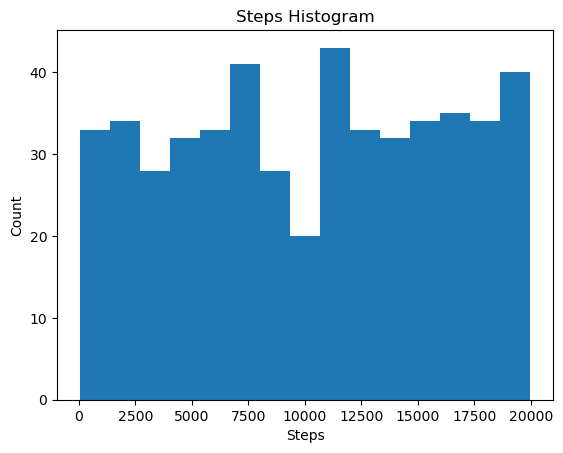

In [11]:
plt.hist(df['steps'], bins=15)
plt.xlabel('Steps')
plt.ylabel('Count')
plt.title('Steps Histogram')
plt.show()

In [ ]:
На этой гистограмме ось X показывает сегменты, а ось Y показывает частоту сегментов. Если мы посмотрим на гистограмму, мы увидим, что интервал 10 000-12 500 больше, а шаг 10 000 меньше.

Здесь я вывел среднее значение distance в dataset, и я использовал метод mean ().

In [14]:
avg_distance = df['distance_km'].mean()

print('The average distance of the track is {} km'.format(round(avg_distance,2)))

The average distance of the track is 7.68 km


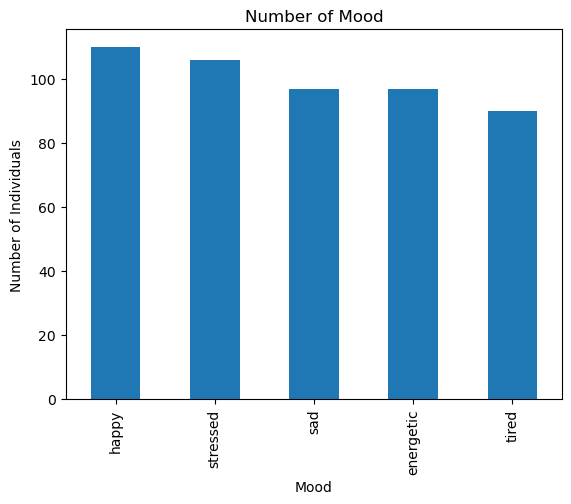

In [16]:
mood_count = df['mood'].values_counts()
mood_count.plot(kind='bar')
plt.title('Number of Mood')
plt.xlabel('Mood')
plt.ylabel('Number of Individuals')
plt.show()


Эта гистограмма показывает частоту настроений

1.Как меняется количество шагов со временем?

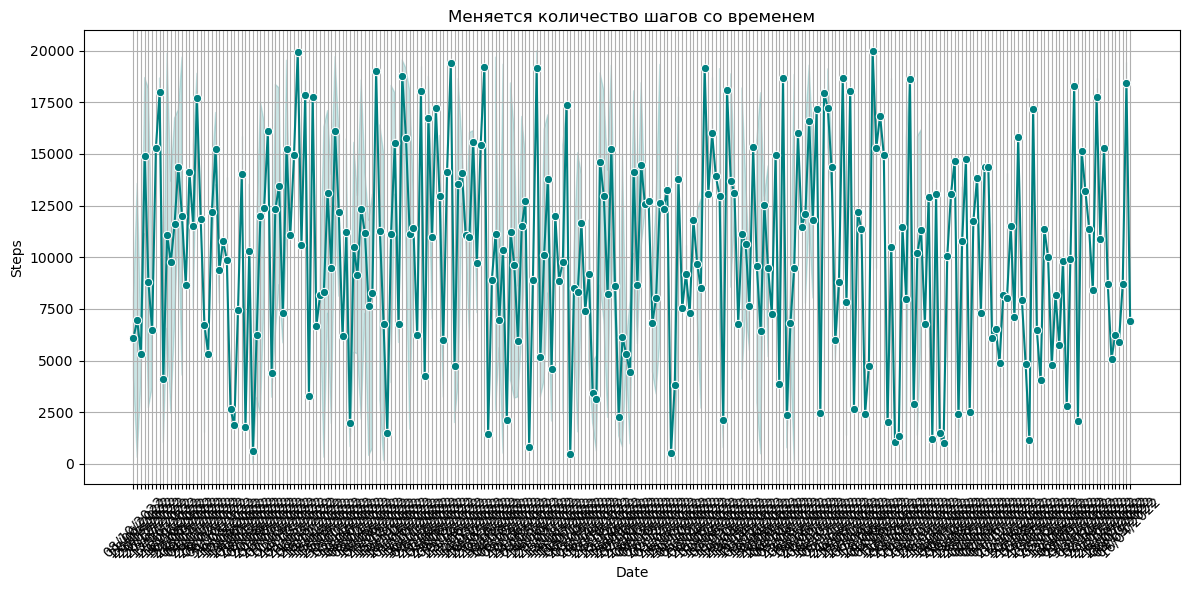

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='steps', data=df, marker='o', color='teal')
plt.title('Меняется количество шагов со временем')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


2.Как распределяется количество сна?

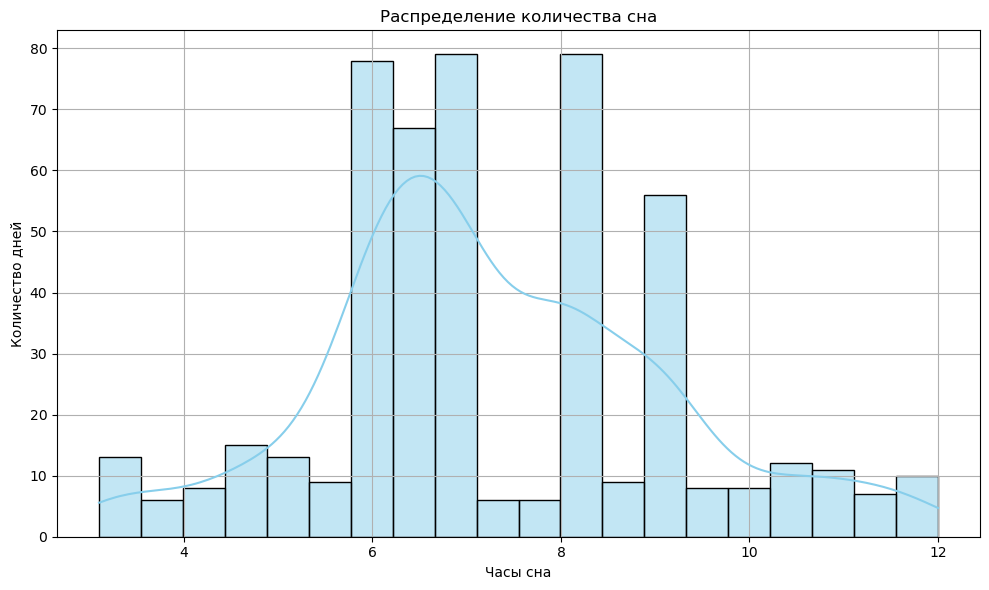

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sleep_hours'], bins=20, kde=True, color='skyblue')

plt.title('Распределение количества сна')
plt.xlabel('Часы сна')
plt.ylabel('Количество дней')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
3. Насколько равномерно пьётся вода?

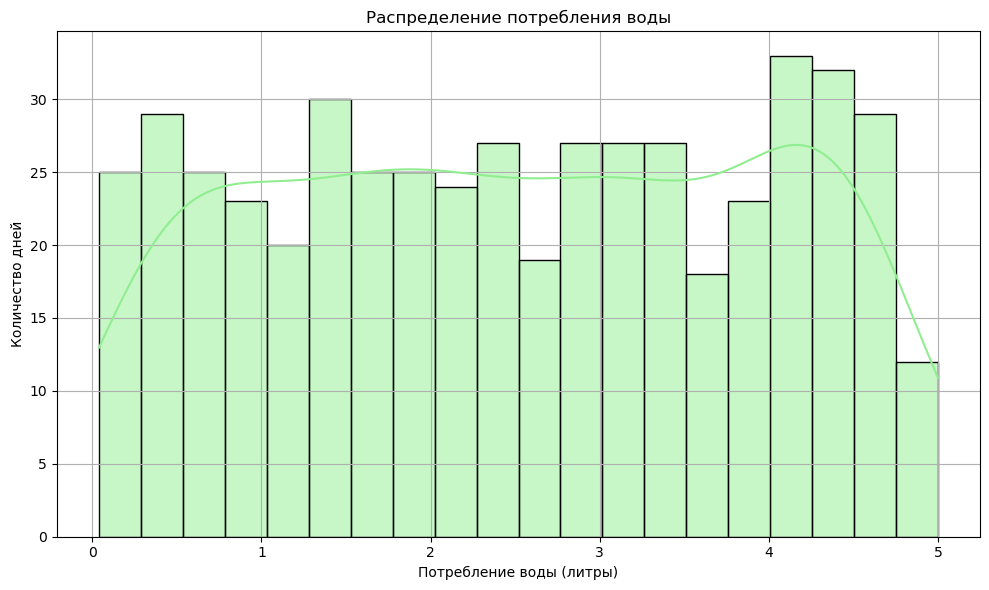

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['water_intake_liters'], bins=20, kde=True, color='lightgreen')

plt.title('Распределение потребления воды')
plt.xlabel('Потребление воды (литры)')
plt.ylabel('Количество дней')
plt.grid(True)
plt.tight_layout()
plt.show()
